# Heart Disease Prediction Using Machine Learning

### Problem Description

Heart disease has been the most leading cause of death in the world. Therefore decided to predict the risk of heart disease and to prevent having heart attack or stroke

The goal of this project is to predict heart disease based on various features provided in the near future. This is a **supervised learning problem**, specifically a **binary classification task**, where the target variable `Heart Disease` indicates whether the patient has heart disease (`1`) or healthy heart (`0`). 


### Data Source

The dataset used in this project was sourced from Kaggle. It can be found at the following link:

[Heart Disease Prediction Problem Dataset](https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction)

This dataset contains patients information which helps to predict the heart condition

### Data Description
​
The dataset consists of: 
​
- Training data: This includes 270 patients information with 14 features.
​
- Test data: This includes new patients information with all the features to predict the heart condition.
​
​
Data features:
​
​
1. Age : Age in years (29-77)
2. Sex : Gender of the patient (0- Female/1-Male)
3. Chest pain type : Type of Chest pain ( 1-angina, 2-pericarditis, 3-myocarditis, 4-cardiomyopathy)
4. BP : Blood Pressure (94-200)
5. Cholesterol : Serum Cholesterol in mg/dl (126-564)
6. FBS over 120 : fasting blood sugar > 120 mg/dl (1-True,0-False  )
7. EKG results : Electrocardiogram (0,1,2)
8. Max HR  : Maximum Heart Rate (71-202)
9. Exercise angina :  exercise induced angina (1- True, 0-False)	
10. ST depression : Used in ECG findings that indicates ST segment is abnormally low and below the baseline
11. Slope of ST  : It is a measure of how quickly the ST segment depresses in relation to heart rate increases (0:Unsloping, 1:Flat, 2:downsloping)
12. Number of vessels fluro : Number of major vessels (0-3) colored by fluoroscopy
13. Thallium :  Diagnosis of heart disease (angiographic disease status) THAL: 3 = normal; 6 = fixed defect; 7 = reversable defect.
14. Heart Disease  :  1 Heart Disease , 0 Healthy heart

In [160]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

### Data Collection and Processing

In [62]:
#loading the csv data to a Pandas Dataframe
heart_data = pd.read_csv("Desktop/Priyanka/Supervised learning/Final/Heart_Disease_Prediction.csv")

In [63]:
#Print first 5 rows of the dataset
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
3,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
4,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1


In [64]:
#Print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [65]:
# Number of rows and columns in the dataset
heart_data.shape

(270, 14)

In [66]:
#getting some information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [67]:
# checking for missing values
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [68]:
# Statistical measures about the data
heart_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


### Exploratory Data Analysis EDA

In [70]:
# checking the distribution of Target variable
heart_data['Heart Disease'].value_counts()
# 1  --> Defective Heart
# 0  --> Healthy Heart

Heart Disease
0    150
1    120
Name: count, dtype: int64

### 1. Distribution of Heart Disease Prediction 

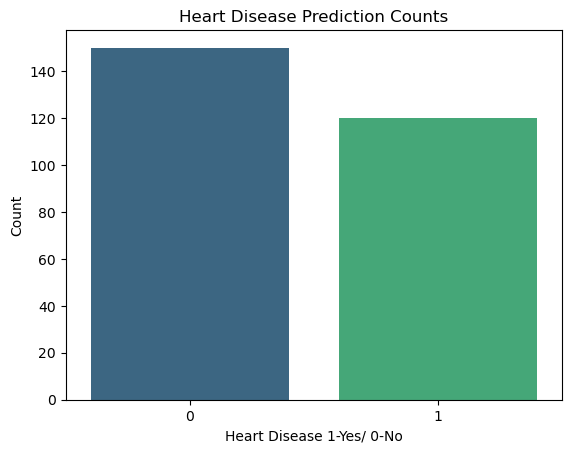

In [72]:
heart_disease_counts = heart_data['Heart Disease'].value_counts().reset_index() 
heart_disease_counts.columns = ['Heart Disease', 'Count'] 

sns.barplot(x='Heart Disease', y='Count', data=heart_disease_counts, palette='viridis', hue='Heart Disease', legend=False)

plt.title('Heart Disease Prediction Counts')
plt.xlabel('Heart Disease 1-Yes/ 0-No')
plt.ylabel('Count')
plt.show()  

### Splitting the features and target


In [74]:
X = heart_data.drop(columns='Heart Disease',axis=1) #Features
Y = heart_data['Heart Disease'] #Target

### 2. Distribution of Numerical Features

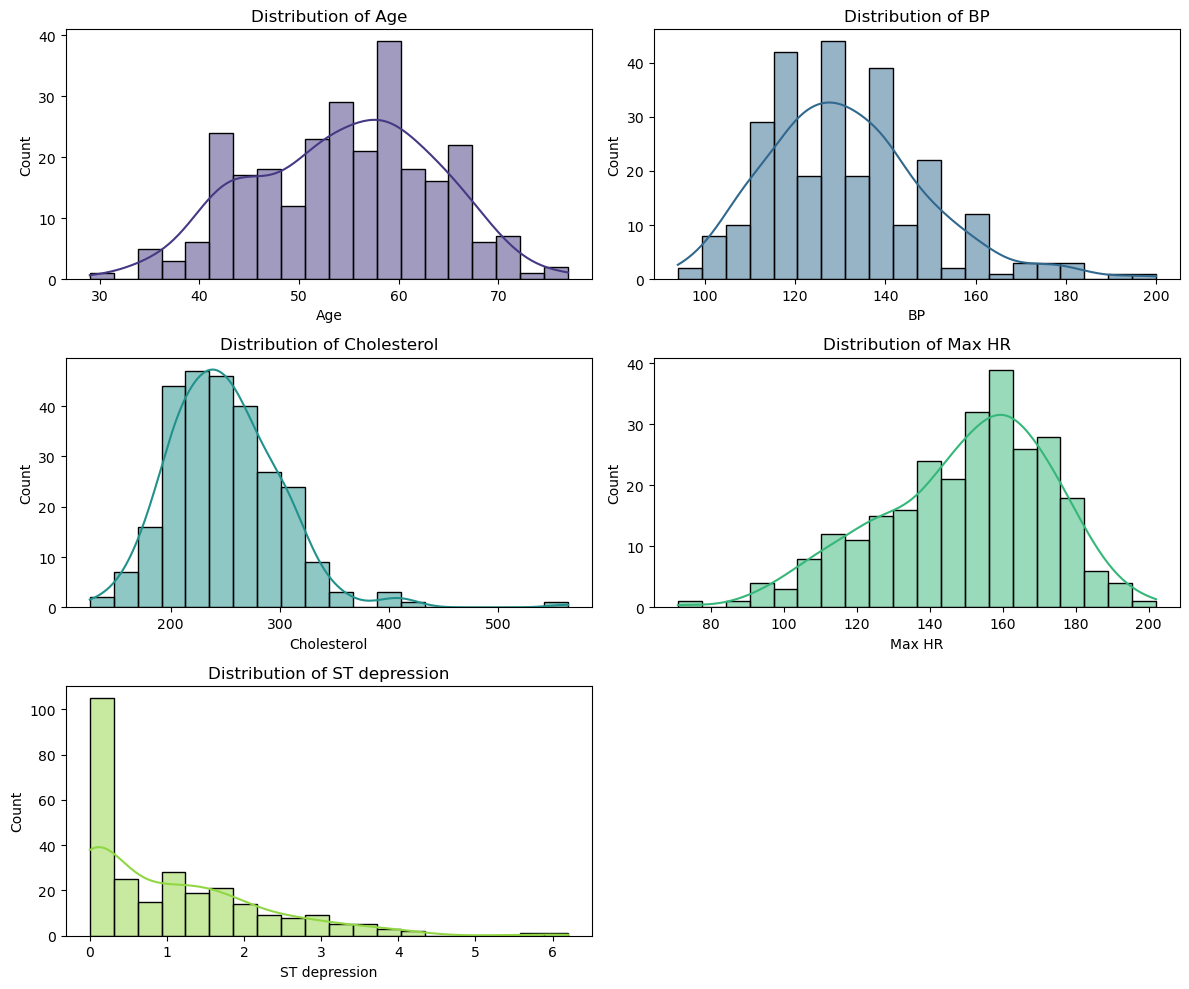

In [78]:
numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
plt.figure(figsize=(12, 10))

colors = sns.color_palette("viridis", len(numerical_columns))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  
    sns.histplot(X[col], kde=True, bins=20, color=colors[i-1])  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()  


### 3. Distribution of Categorical Features

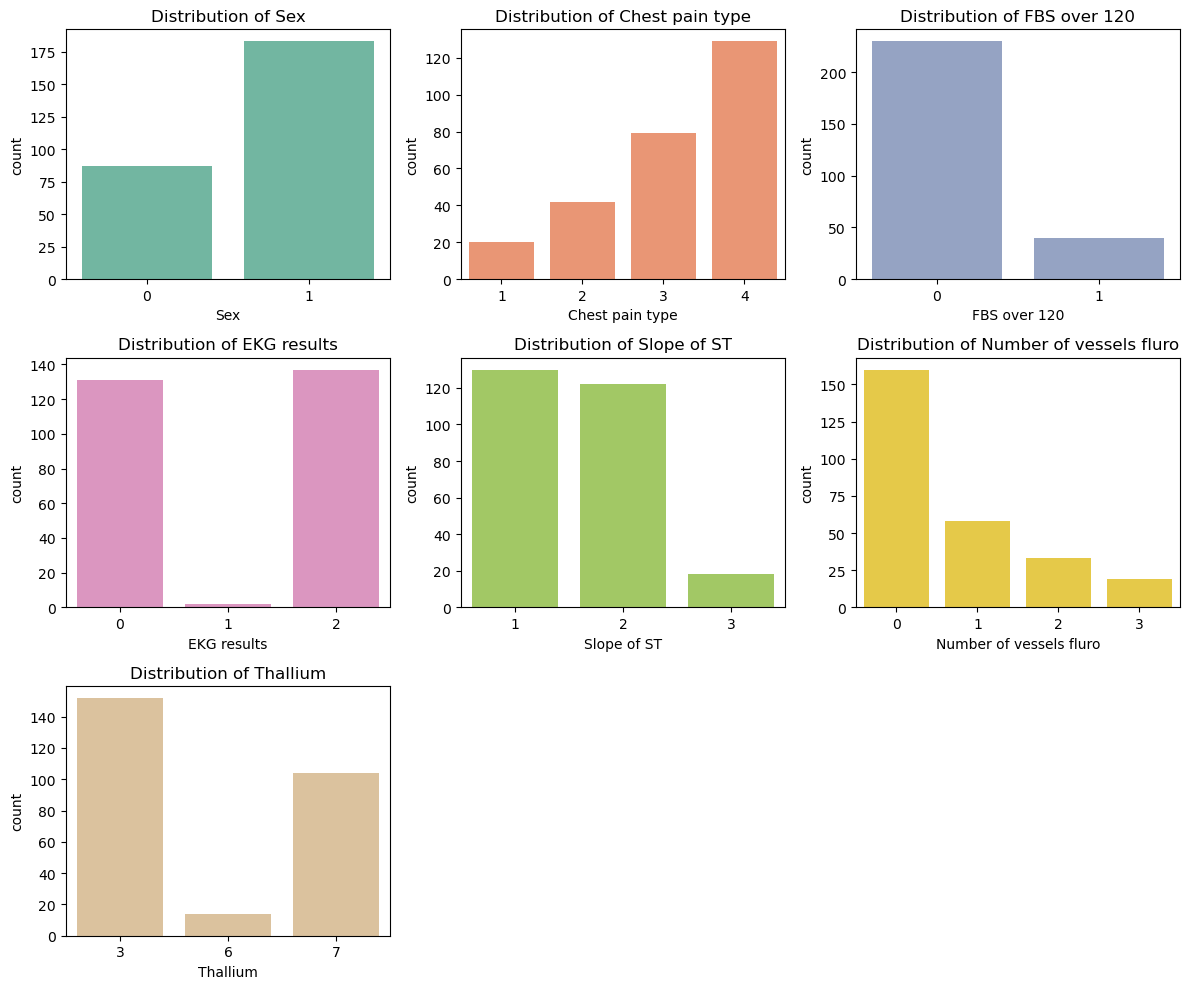

In [82]:
# List of categorical columns to plot
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
colors = sns.color_palette("Set2", len(categorical_columns))
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_columns, 0): 
    plt.subplot(3, 3, i + 1)  
    sns.countplot(data=X, x=col, color=colors[i]) 
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()  


### 4. Correlation Heatmap 

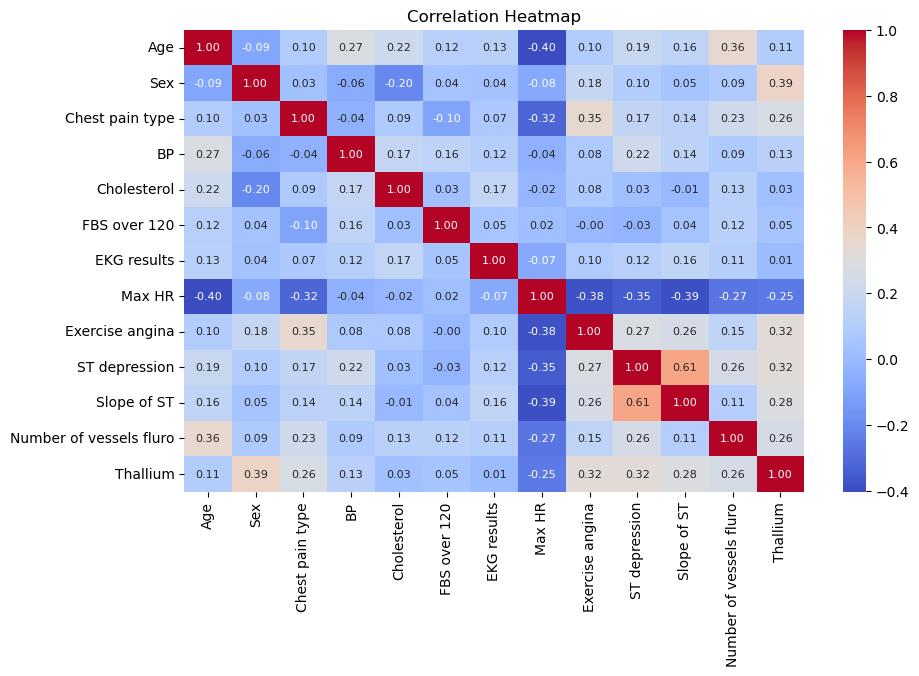

In [84]:
plt.figure(figsize=(10, 6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()


### Model Building and Evaluation

##### Performed Cross Validation on below models
    > Logistics regression
    > Random Forest
    > Extra Trees
    > Support Vector Machine
    > Scaled SVM 

In [138]:
# remove
# Cross Validation on various Models
X = heart_data.drop(columns='Heart Disease',axis=1)
Y = heart_data['Heart Disease']
def model_all_features(modelname):
    kf = KFold(n_splits=5)
    if modelname=='Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreeClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf')
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf')

    #Train and Test using kfold
    accuracies,precision,recall,f1score, roc_aucs  = [],[],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions, average='macro'))
    recall.append(recall_score(y_test, predictions, average='macro'))
    f1score.append(f1_score(y_test, predictions, average='macro'))
    roc_aucs.append(roc_auc_score(y_test, probabilities))
    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of "+modelname +" Model", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of "+modelname +" Model", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of "+modelname +" Model", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of "+modelname +" Model", average_f1score)
    average_roc_auc = np.mean(roc_aucs)
    print("Average ROC AUC of " + modelname + " Model:", average_roc_auc)

In [186]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

def model_all_features(modelname):
    kf = KFold(n_splits=5)
    if modelname == 'Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreesClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf', probability=True)  # Enable probability estimates
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf', probability=True)  # Enable probability estimates

    # Initialize lists to hold metrics
    accuracies, precision, recall, f1score, roc_aucs = [], [], [], [], []

    # Train and Test using KFold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)
        probabilities = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, predictions))
        precision.append(precision_score(y_test, predictions, average='macro'))
        recall.append(recall_score(y_test, predictions, average='macro'))
        f1score.append(f1_score(y_test, predictions, average='macro'))
        roc_aucs.append(roc_auc_score(y_test, probabilities))  

    # Calculate average metrics
    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of " + modelname + " Model:", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of " + modelname + " Model:", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of " + modelname + " Model:", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of " + modelname + " Model:", average_f1score)
    average_roc_auc = np.mean(roc_aucs)
    print("Average ROC AUC of " + modelname + " Model:", average_roc_auc)

# Example usage
# model_all_features('RF')  # Call this function with the desired model name


### Performance Metrics of each model

In [188]:
model_all_features("Logistic")

Logistic Regression Model
Average Accuracy of Logistic Model: 0.837037037037037
Average Precision of Logistic Model: 0.8389905667099175
Average Recall of Logistic Model: 0.8312543921253417
Average F1 Score of Logistic Model: 0.8332290651237383
Average ROC AUC of Logistic Model: 0.9040222566542935


In [190]:
model_all_features("RF")

Random Forest Model
Average Accuracy of RF Model: 0.8185185185185185
Average Precision of RF Model: 0.8211624858157762
Average Recall of RF Model: 0.8114884718020932
Average F1 Score of RF Model: 0.8130228168723382
Average ROC AUC of RF Model: 0.9026678147121696


In [192]:
model_all_features('ExtraTrees')

Extra Trees Model
Average Accuracy of ExtraTrees Model: 0.8185185185185186
Average Precision of ExtraTrees Model: 0.8196033176593522
Average Recall of ExtraTrees Model: 0.8157808169889469
Average F1 Score of ExtraTrees Model: 0.8153943432325377
Average ROC AUC of ExtraTrees Model: 0.9093122341465609


In [194]:
model_all_features('SVM')

SVM Model
Average Accuracy of SVM Model: 0.6555555555555556
Average Precision of SVM Model: 0.6640342922659996
Average Recall of SVM Model: 0.6311337328379091
Average F1 Score of SVM Model: 0.6232835190933301
Average ROC AUC of SVM Model: 0.7531774490884493


In [196]:
model_all_features('Scaled SVM')

Scaled SVM Model
Average Accuracy of Scaled SVM Model: 0.8333333333333334
Average Precision of Scaled SVM Model: 0.833924420016636
Average Recall of Scaled SVM Model: 0.8293489289844782
Average F1 Score of Scaled SVM Model: 0.8300223658366865
Average ROC AUC of Scaled SVM Model: 0.9023956588991713


### Model Prediction

In [198]:
X = heart_data.drop(columns='Heart Disease',axis=1)
Y = heart_data['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[24  6]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



### Performance of Predicted Model

Precision of Logistic Regression Model: 0.75
Recall of Logistic Regression Model: 0.75
F1 Score of Logistic Regression Model: 0.75
Accuracy of Logistic Regression Model: 0.7777777777777778
ROC AUC of Logistic Regression Model: 0.8652777777777778


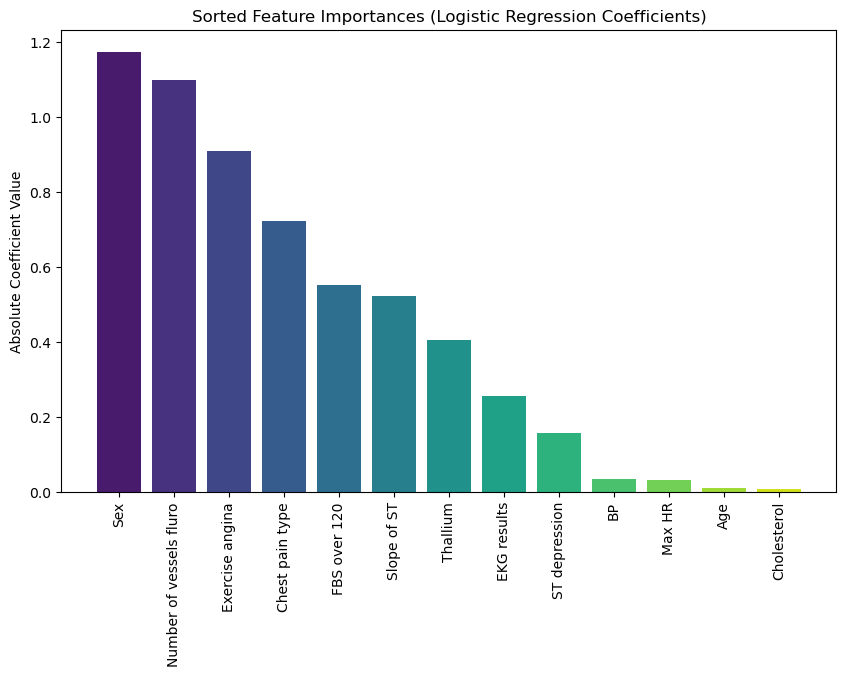

In [202]:
# Print evaluation metrics
print("Precision of Logistic Regression Model:", precision_score(y_test, predictions))
print("Recall of Logistic Regression Model:", recall_score(y_test, predictions))
print("F1 Score of Logistic Regression Model:", f1_score(y_test, predictions))
print("Accuracy of Logistic Regression Model:", accuracy_score(y_test, predictions))
# Calculate and print ROC AUC
roc_auc = roc_auc_score(y_test, predicted_probabilities)
print("ROC AUC of Logistic Regression Model:", roc_auc)

# Get model coefficients and feature names
coefficients = model.coef_[0]
feature_importances = zip(X_train.columns, coefficients)

# Create a DataFrame for feature importance
df_feature_importances = pd.DataFrame(feature_importances, columns=['Feature', 'Coefficient'])

# Sort features by the absolute value of coefficients
df_feature_importances['Importance'] = df_feature_importances['Coefficient'].abs()
sorted_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

# Define a color palette
colors = sns.color_palette("viridis", len(sorted_feature_importances))

# Plotting feature importances with colors
plt.figure(figsize=(10, 6))
plt.title("Sorted Feature Importances (Logistic Regression Coefficients)")
plt.bar(sorted_feature_importances['Feature'], sorted_feature_importances['Importance'], color=colors)
plt.xticks(rotation=90)
plt.ylabel('Absolute Coefficient Value')
plt.show()


### Saving the Trained Model

In [204]:
import pickle
filename ='trained_model.sav'
pickle.dump(model, open(filename,'wb'))

In [206]:
#loading the saved model 
loaded_model = pickle.load(open('trained_model.sav','rb'))

### Testing for Sample record

In [208]:
# Input data as a tuple
input_data = (74, 0, 2, 120, 269, 0, 2, 121, 1, 0.2, 1, 1, 3)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Define the feature names (make sure these match your model's training feature names)
feature_names = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR','Exercise angina',  'ST depression', 'Slope of ST','Number of vessels fluro', 'Thallium']

# Create a DataFrame with the input data
input_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

# Make the prediction
prediction = loaded_model.predict(input_df)
print(prediction)

# Output interpretation
if prediction[0] == 0:
    print('The Person has a Healthy Heart')
else:
    print('The Person has Heart Disease')


[0]
The Person has a Healthy Heart


### Discussion and Conclusion

The Heart Disease Prediction model demonstrates good performance with the Logistic Regression Model. Some of the key takeaways are:
- The most important features for prediction were `Chest Pain Type` and next are `Thallium` and `Max HR`. 
- Logistic Regression achieved an accuracy of approximately 78% on the test set and also ROC AUC score with 90.4 %
- The Logistic Regression model shows a good balance between accuracy and simplicity which suits for straightforward implementation
- Developed a web application which allows healthcare providers to input patient data and receive instant predictions
  


#### Future Work

- We could explore more methods - consider ensemble methods that combine the strengths of multiple models to enhance predictive accuracy and robustness.
- Acquiring a larger, more diverse dataset could improve generalization and model.